<a href="https://colab.research.google.com/github/ZiqingZhou694/Fake-News-Detection-/blob/main/ML_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import random

In [400]:
# read the files
fake = pd.read_csv("./Input/Fake.csv")
real = pd.read_csv("./Input/True.csv")

# test output
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [432]:
# Insert the column class for true or fake, 1 or 0
fake["class"] = 0
real["class"] = 1
# output the shape of data
fake.shape, real.shape

((23481, 5), (21417, 5))

In [433]:
#combine the data
df = pd.concat([fake, real], ignore_index=True)
# first 5 data
df.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [434]:
#clean data
# title-only is title, Text change to text
df = df[["title","text", "class"]]
df = df.dropna()
df = df.drop_duplicates()
print(df["class"].value_counts())

class
1    21197
0    17908
Name: count, dtype: int64


In [435]:
# TF-IDF

#
# Create a vectorizer, retaining up to 5000 words
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
# title-only is title, Text change to text
X = tfidf.fit_transform(df["title"])
y = df["class"]
# Splitting Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)



Train set size: (31284, 5000)
Test set size: (7821, 5000)


In [436]:
# Naive Bayes
NB = MultinomialNB()
NB.fit(X_train, y_train)

# predict
y_pred = NB.predict(X_test)

# report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3582
           1       0.94      0.94      0.94      4239

    accuracy                           0.94      7821
   macro avg       0.93      0.94      0.93      7821
weighted avg       0.94      0.94      0.94      7821



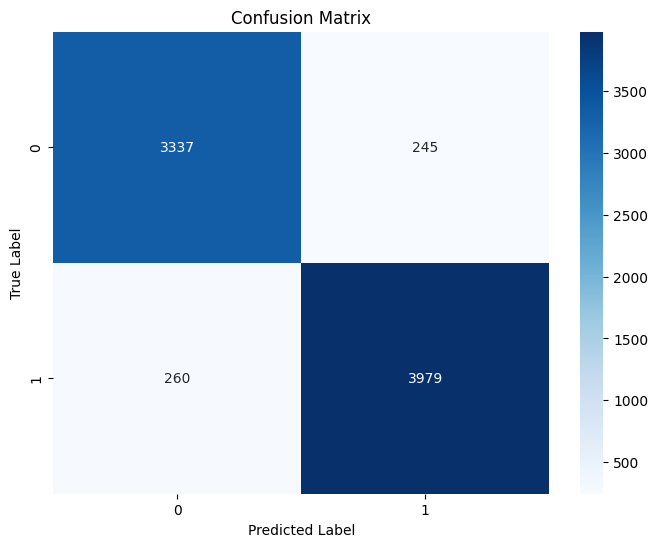

In [437]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [398]:

# Need analyze the keywords of fake and real
def clean_text(text):
  text_lower = text.lower()
  text_without_punct = "".join(c for c in text_lower if c not in string.punctuation)
  text_without_punct = " ".join(text_without_punct.split())
  return text_without_punct
df = pd.concat([fake, real], ignore_index=True)

df = df[["text", "class"]]
df.loc[0].text


'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [399]:
clean_text(df.loc[0].text)
df['text'] = df['text'].apply(clean_text)
X = df['text']
y = df['class']

In [390]:
# Create a vectorizer, retaining up to 5000 words
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
# title-only is title, Text change to text
X = tfidf.fit_transform(df["text"])
y = df["class"]
# Splitting Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

KeyError: 'text'

In [358]:
# Naive Bayes
NB = MultinomialNB()
NB.fit(X_train, y_train)

# predict
y_pred = NB.predict(X_test)

# report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3581
           1       0.94      0.93      0.93      4165

    accuracy                           0.93      7746
   macro avg       0.93      0.93      0.93      7746
weighted avg       0.93      0.93      0.93      7746



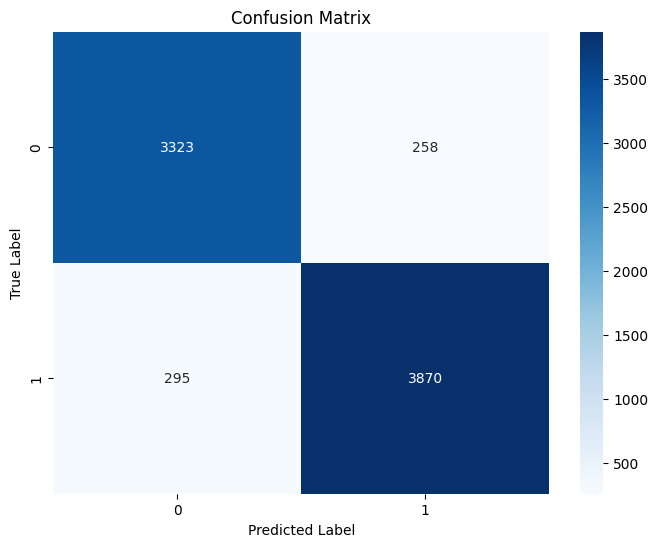

In [359]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [406]:
import numpy as np


feature_names = tfidf.get_feature_names_out()

log_prob = NB.feature_log_prob_  # shape: [2, n_features]
classes = NB.classes_            # ["FAKE", "REAL"]


def show_top_keywords(log_prob, feature_names, class_index, class_label, top_n=20):
    top_indices = np.argsort(log_prob[class_index])[::-1][:top_n]
    print(f"\nTop {top_n} keywords for class: {class_label}")
    for i in top_indices:
        print(f"{feature_names[i]:<20} {log_prob[class_index][i]:.4f}")


show_top_keywords(log_prob, feature_names, class_index=0, class_label=classes[0])


show_top_keywords(log_prob, feature_names, class_index=1, class_label=classes[1])



Top 20 keywords for class: 0
video                -4.1062
trump                -4.1476
hillary              -5.1027
obama                -5.1141
watch                -5.1232
just                 -5.2484
donald               -5.5572
gop                  -5.6294
clinton              -5.6614
president            -5.6927
tweets               -5.8406
black                -5.8474
breaking             -5.8745
news                 -5.8799
white                -5.9649
new                  -5.9656
gets                 -6.0108
america              -6.0371
republicans          -6.1447
muslim               -6.1770

Top 20 keywords for class: 1
trump                -4.4147
says                 -4.5617
house                -5.0947
russia               -5.4129
korea                -5.4923
north                -5.5039
senate               -5.5802
new                  -5.5867
china                -5.6061
white                -5.6203
court                -5.6590
tax                  -5.7046
republican  

Classification Report Title Only:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3582
           1       0.94      0.94      0.94      4239

    accuracy                           0.94      7821
   macro avg       0.93      0.94      0.93      7821
weighted avg       0.94      0.94      0.94      7821

Classification Report Text Only:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3582
           1       0.92      0.94      0.93      4239

    accuracy                           0.92      7821
   macro avg       0.92      0.92      0.92      7821
weighted avg       0.92      0.92      0.92      7821

Classification Report Combined Text and Title:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3582
           1       0.94      0.94      0.94      4239

    accuracy                           0.93      7821
   macro avg  

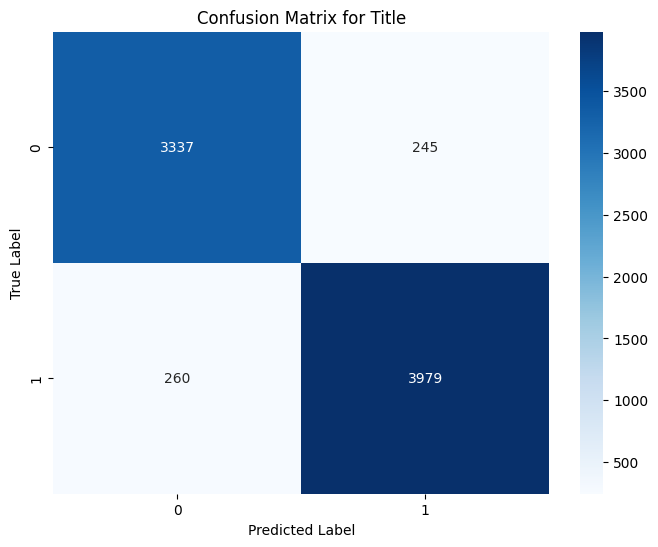

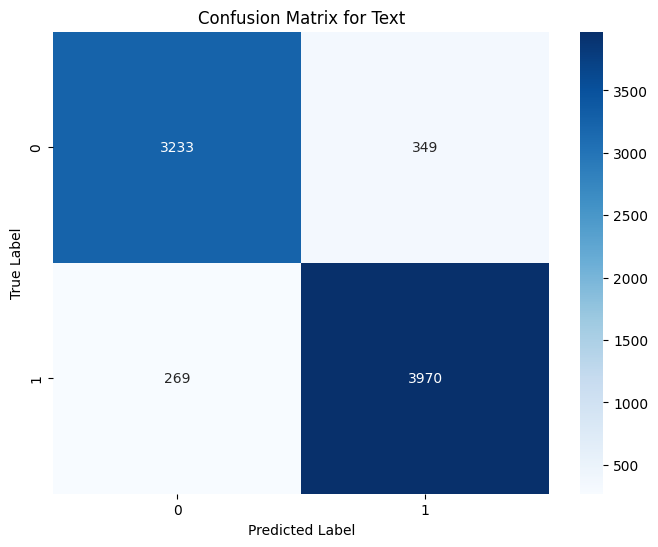

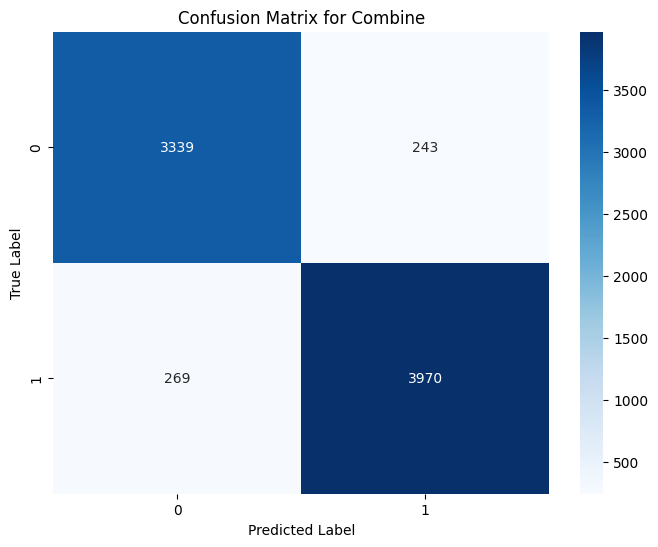

In [495]:
# code combine

# read the files
fake = pd.read_csv("./Input/Fake.csv")
real = pd.read_csv("./Input/True.csv")

# Insert the column class for true or fake, 1 or 0
fake["class"] = 0
real["class"] = 1

#combine the data
df = pd.concat([fake, real], ignore_index=True)

#clean data
# This inculde the column title, text, and class
df = df[["title","text", "class"]]
df = df.dropna()
df = df.drop_duplicates()

#============================The trainning for title ==========================================

# Create a vectorizer, retaining up to 5000 words
tfidf_title = TfidfVectorizer(stop_words='english', max_features=5000)# TF-IDF
# title-only is title, Text change to text
X_title = tfidf_title.fit_transform(df["title"])
y = df["class"]

# Splitting Training
X_train, X_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=42, stratify=y)

# Naive Bayes
NB = MultinomialNB()
NB_title = NB.fit(X_train, y_train)

# predict
y_pred = NB_title.predict(X_test)

#============================ The trainning for text ==========================================

# Create a vectorizer, retaining up to 5000 words
tfidf_text = TfidfVectorizer(stop_words='english', max_features=5000)# TF-IDF
# title-only is title, Text change to text
X_text = tfidf_title.fit_transform(df["text"])
y = df["class"]

# Splitting Training
X_train_tx, X_test_tx, y_train_tx, y_test_tx = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

# Naive Bayes
NB_text = MultinomialNB().fit(X_train_tx, y_train_tx)

#============================ The trainning for both title and text ==========================================

# combine the title and the text
df["combined"] = df["title"] + " " + df["text"]
tfidf_combined = TfidfVectorizer(stop_words='english', max_features=5000)
X_comb = tfidf_combined.fit_transform(df["combined"])
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_comb, y, test_size=0.2, stratify=y, random_state=42)
NB_combined = MultinomialNB().fit(X_train_c, y_train_c)


# report
print("Classification Report Title Only:")
print(classification_report(y_test, y_pred))
print("Classification Report Text Only:")
print(classification_report(y_test_tx, NB_text.predict(X_test_tx)))
print("Classification Report Combined Text and Title:")
print(classification_report(y_test_c, NB_combined.predict(X_test_c)))

# Plot confusion matrix

#============== Title ================

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title("Confusion Matrix for Title")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

#============== Text ================

cm = confusion_matrix(y_test_tx, NB_text.predict(X_test_tx))
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title("Confusion Matrix for Text")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

#============== both ================

cm = confusion_matrix(y_test_c, NB_combined.predict(X_test_c))
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title("Confusion Matrix for Combine")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [426]:
# Model Testing
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
def testing(news):
    # create DataFrame
    new_data = pd.DataFrame({"title": [news]})
    # text to vectors
    new_x = tfidf.transform(new_data["title"])

    # Model predictions Naive Bayes, Logistic
    pred_NB = NB.predict(new_x)[0]

    # Output
    print("Model Predictions for the input:\n")
    print("Text: ", news)
    print("\nNaive Bayes:", output_label(pred_NB))

testing("Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing")

# Combine title and text for the input
random_index = random.choice(df.index)
combined_text = df.loc[random_index, 'title']

testing(combined_text)



Model Predictions for the input:

Text:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing

Naive Bayes: Fake News
Model Predictions for the input:

Text:  BOOM! 4 VENUES CANCEL KATHY GRIFFIN Appearances After She Blames Trump For Her Career Ending Decision To Pose With His Severed Head

Naive Bayes: Fake News


In [510]:
# Model 2 Testing
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
def testing(news_title, news_text, mode="title"):
    if mode == "title":
        input_text = news_title
    elif mode == "text":
        input_text = news_text
    elif mode == "both":
        input_text = news_title + " " + news_text
    else:
        raise ValueError("mode must be 'title', 'text', or 'both'.")

    new_data = pd.DataFrame({"input": [input_text]})
    new_x = tfidf.transform(new_data["input"])
    pred_NB = NB.predict(new_x)[0]

    print(f"\n--- Testing mode: {mode.upper()} ---")
    print("Title:", news_title)
    print("Text:", news_text[:100], "..." if len(news_text) > 100 else "")
    print("Prediction:", output_label(pred_NB))

# random the Combine Fake and True data for testing
random_index = random.choice(df.index)
title = df.loc[random_index, "title"]
text = df.loc[random_index, "text"]

# test title/ text/ both
testing(title, text, mode="title")
testing(title, text, mode="text")
testing(title, text, mode="both")




--- Testing mode: TITLE ---
Title: MASSACHUSETTS VOTES TO IGNORE FED LAW and Let Illegals Go…This Sanctuary State Endangers All Americans!
Text: MASSACHUSETTS IS NOW A SANCTUARY STATE! The Massachusetts Supreme Court just ruled that illegals are ...
Prediction: Fake News

--- Testing mode: TEXT ---
Title: MASSACHUSETTS VOTES TO IGNORE FED LAW and Let Illegals Go…This Sanctuary State Endangers All Americans!
Text: MASSACHUSETTS IS NOW A SANCTUARY STATE! The Massachusetts Supreme Court just ruled that illegals are ...
Prediction: Real News

--- Testing mode: BOTH ---
Title: MASSACHUSETTS VOTES TO IGNORE FED LAW and Let Illegals Go…This Sanctuary State Endangers All Americans!
Text: MASSACHUSETTS IS NOW A SANCTUARY STATE! The Massachusetts Supreme Court just ruled that illegals are ...
Prediction: Real News


In [516]:
def evaluate_testing(n=100):
    agree_title = 0
    agree_text = 0

    for _ in range(n):
        random_index = random.choice(df.index)
        title = df.loc[random_index, "title"]
        text = df.loc[random_index, "text"]
        combined = title + " " + text

        # 向量化
        x_title = tfidf.transform([title])
        x_text = tfidf.transform([text])
        x_both = tfidf.transform([combined])

        # 预测
        pred_title = NB.predict(x_title)[0]
        pred_text = NB.predict(x_text)[0]
        pred_both = NB.predict(x_both)[0]

        # 比较是否一致
        if pred_title == pred_both:
            agree_title += 1
        if pred_text == pred_both:
            agree_text += 1

    print(f"\nCompared against BOTH (title+text) on {n} samples:")
    print(f"TITLE agreement: {agree_title/n:.1%}")
    print(f"TEXT  agreement: {agree_text/n:.1%}")

evaluate_testing(n=100)




Compared against BOTH (title+text) on 100 samples:
TITLE agreement: 93.0%
TEXT  agreement: 99.0%
